In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Logistic regression classifies with bernoulli values, so we need a function that constrains any real number to the interval [0, 1]
###### Negative values need to output 0, and positive values need to output 1
###### The sigmoid function fits our needs perfectly

In [2]:
def sigmoid(pred_val):
    return 1 / (1 + np.exp(-pred_val))

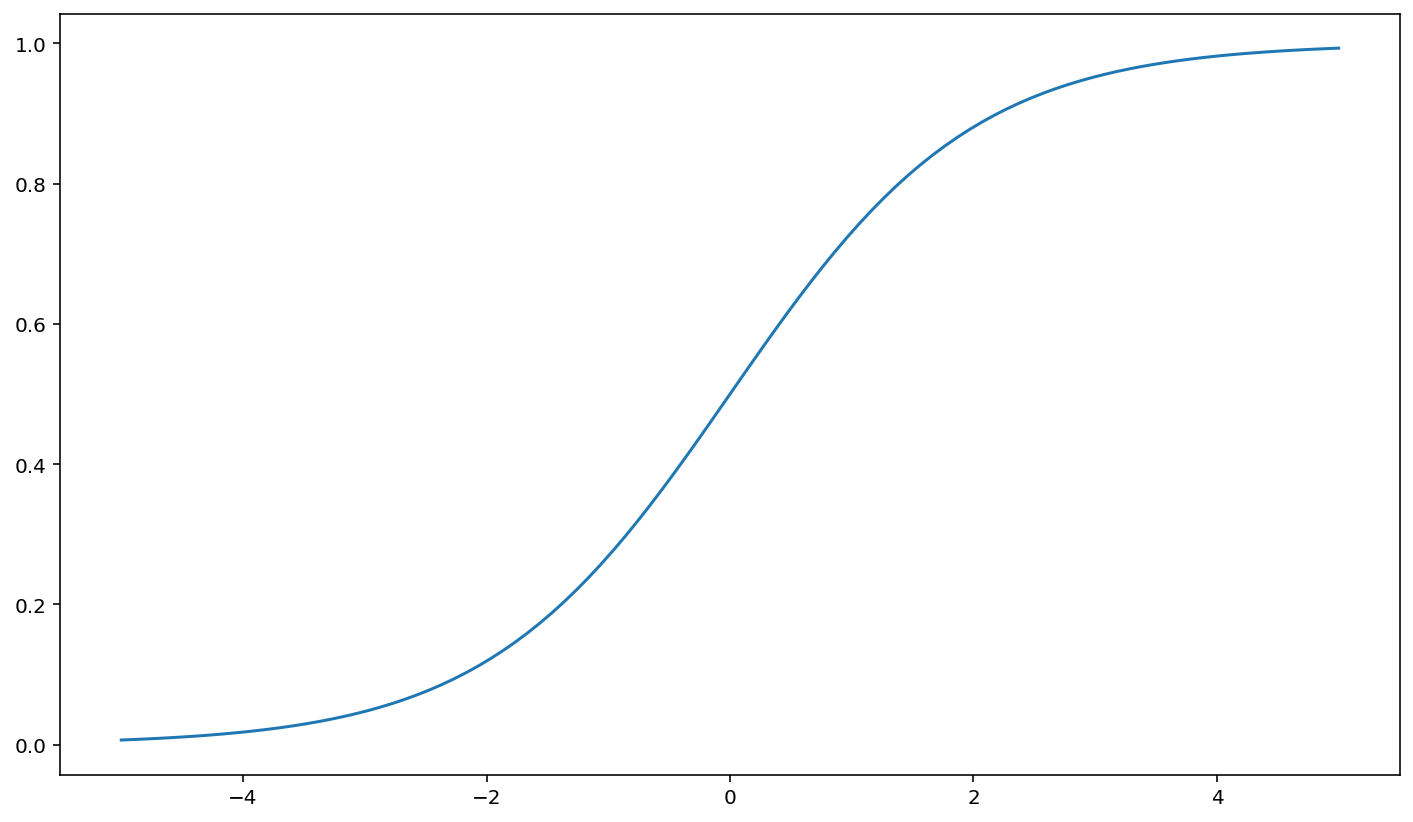

In [3]:
# visualization of sigmoid
sigmoid_x = np.linspace(-5, 5, 100)
sigmoid_y = sigmoid(sigmoid_x)

plt.plot(sigmoid_x, sigmoid_y)

<h6>
    We also need a cost function that changes depending on if the output value is 0 or 1
    <br>
    When the actual value is 0, a predicted value of 1 should have infinite cost and vice versa
    <br>
    The cost function below satisfies these requirements
</h6>

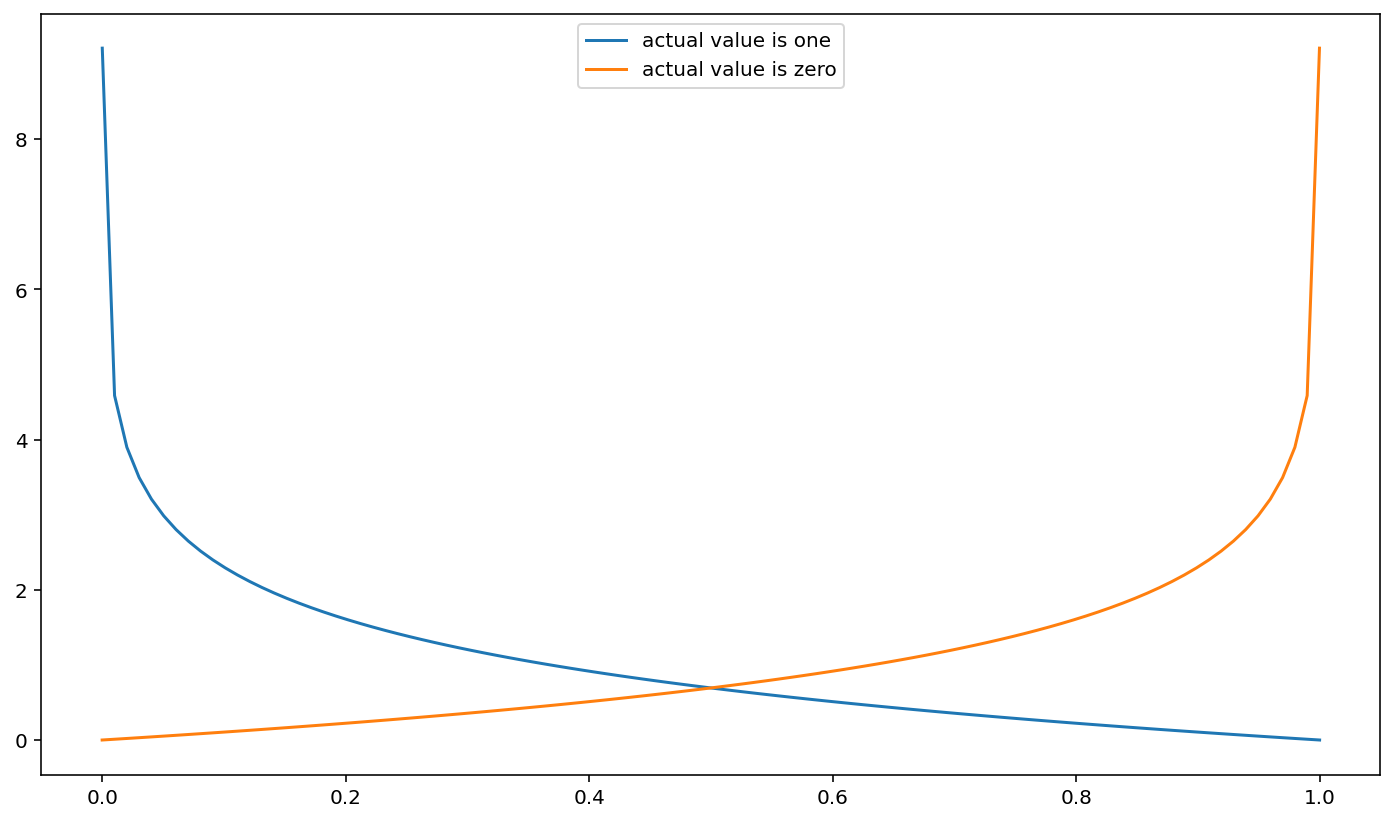

In [4]:
# visualization of cost function
zero_cost_function_x = np.linspace(0.0001, 1, 100)
zero_cost_function_y = -np.log(zero_cost_function_x)

one_cost_function_x = np.linspace(0, 0.9999, 100)
one_cost_function_y = -np.log(1 - one_cost_function_x)

plt.plot(zero_cost_function_x, zero_cost_function_y, label="actual value is one")
plt.plot(one_cost_function_x, one_cost_function_y, label="actual value is zero")

plt.legend()
plt.show()

###### The cost function is slightly different for logistic regression (to handle the sigmoid function) but the derivative is exactly the same

In [5]:
# combined cost function for logistic regression
def cost(pred_val, actual_val, m):
    return (1 / m) * np.sum(-actual_val.T @ np.log(pred_val) - (1 - actual_val).T @ np.log(1 - pred_val))

In [6]:
# cost function for linear regression
def cost_linear(predicted, actual, m):
    return (1 / (2 * m)) * np.sum(np.square(predicted - actual))

In [7]:
# cost derivative for linear regression (same as linear regression)
def cost_derivative(pred_val, actual_val, input_val, m):
    return (1/ m) * input_val.T @ (pred_val - actual_val)

<h3>
    <u>Simple 'linear' logistic regression</u>
</h3>

###### The goal of our algorithm is to output a dividing line between the two sections of dots

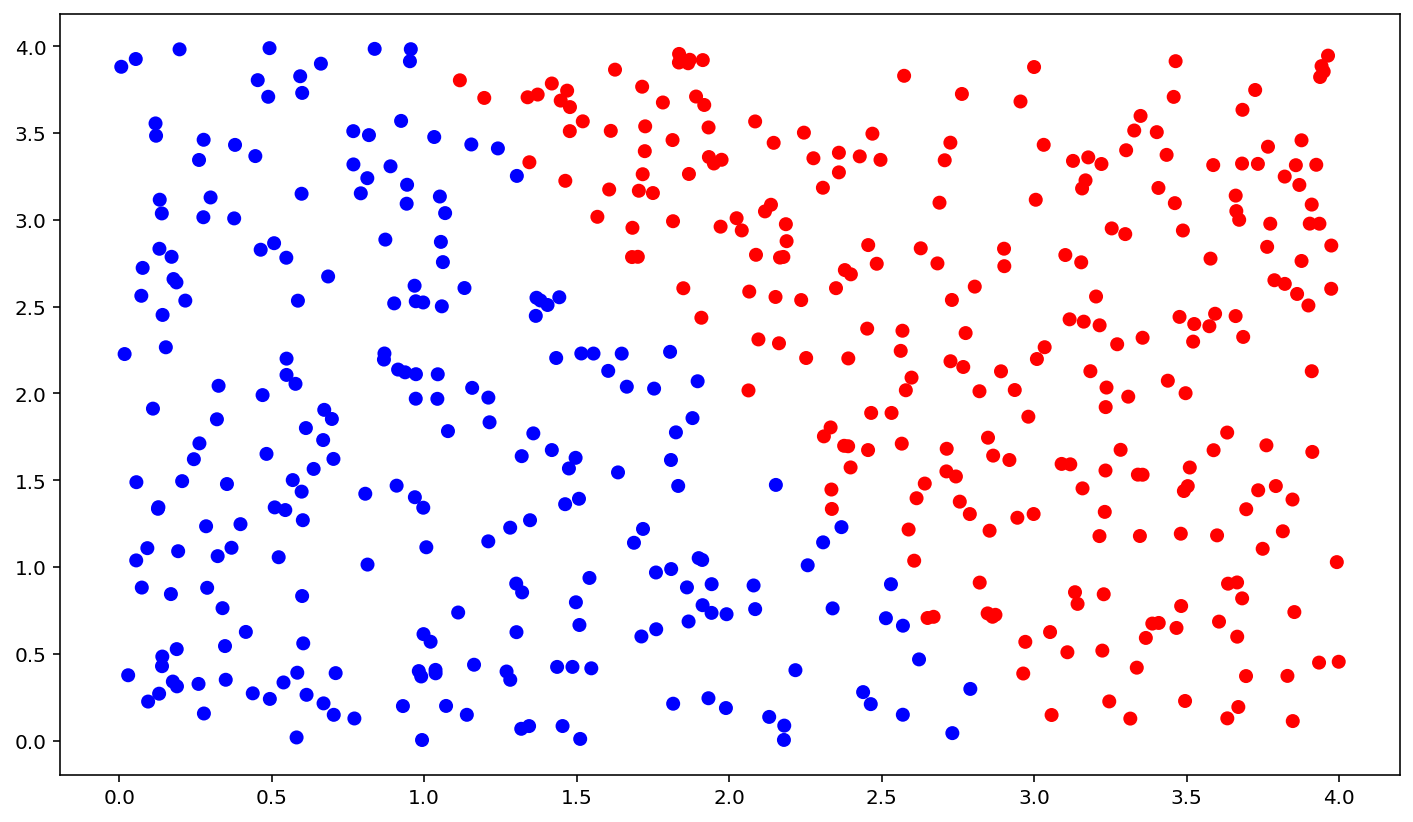

In [8]:
# visualization of data set
plot_log_x = np.random.random(500) * 4
plot_log_y = np.random.random(500) * 4

plot_classification = (3 - plot_log_x - 0.5 * plot_log_y > 0)

plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap = "bwr_r")

In [9]:
# get the input and output values
logistic_input = np.matrix([np.ones(plot_log_x.size), plot_log_x, plot_log_y]).T
logistic_output = np.matrix(1 * plot_classification).T
thetas = np.matrix(np.random.random(3) - 0.5).T

In [10]:
# define cost slope values to visualize the cost function
cost_theta_one = np.linspace(-5, 5, 1000)
cost_vals_linear = []
cost_vals_logistic = []

for theta_one in cost_theta_one:
    temp_thetas = np.matrix([-2.92802167, theta_one , 0.48288023]).T
    cost_vals_linear.append(cost_linear(sigmoid(logistic_input @ temp_thetas), logistic_output, plot_log_x.size))
    cost_vals_logistic.append(cost(sigmoid(logistic_input @ temp_thetas), logistic_output, plot_log_x.size))

###### We were curious to see why you can't use the original cost function in logistic regression
###### In the plot below, you can see that the linear cost function has two spots where the derivative is 0 (and even more for more variables), while the logistic cost function only has one

[Text(0.5, 1.0, 'Logistic Regression Cost Function')]

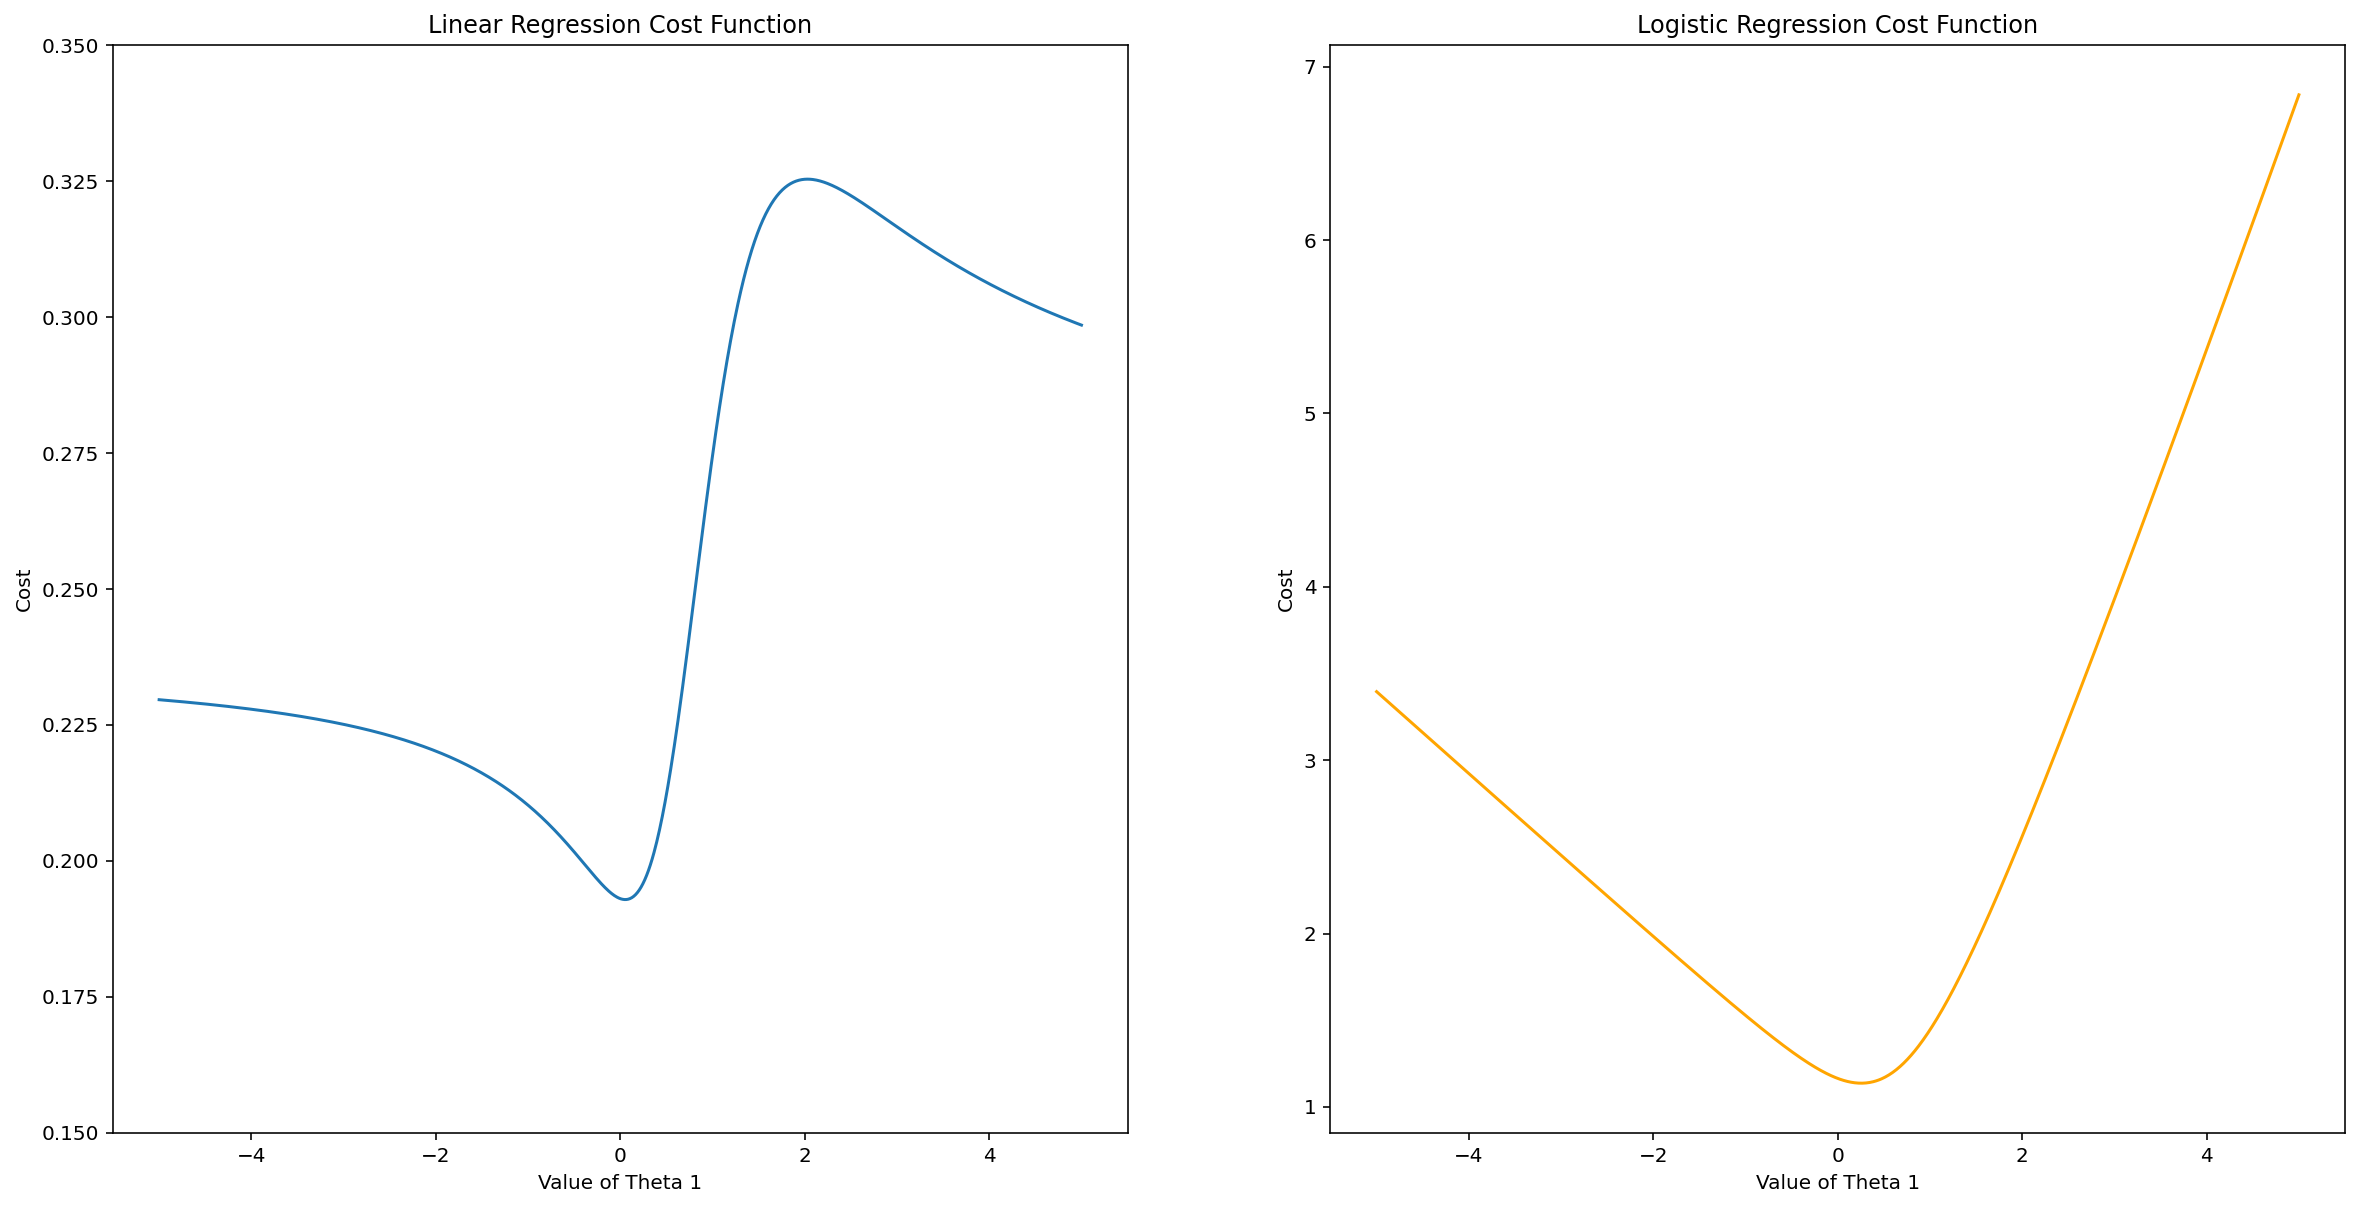

In [11]:
# plotting the two cost functions side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(cost_theta_one, np.array(cost_vals_linear), 1)
axs[0].set_ylim(0.15, 0.35)
axs[0].set(xlabel = 'Value of Theta 1')
axs[0].set(ylabel = 'Cost')
axs[0].set(title = 'Linear Regression Cost Function')

axs[1].plot(cost_theta_one, np.array(cost_vals_logistic), 2, c="orange")
axs[1].set(xlabel = 'Value of Theta 1')
axs[1].set(ylabel = 'Cost')
axs[1].set(title = 'Logistic Regression Cost Function')

In [12]:
# define our constants
m = plot_log_x.size
learning_rate = 0.5
num_iterations = 10000

###### Our values are slightly off, but this can be attributed to a lack of sample size, as well as inherit error in the regression process

In [13]:
# gradient descent for logistic regression
for iteration in range(num_iterations):
    pred_output = sigmoid(logistic_input @ thetas)
    thetas = thetas - learning_rate * cost_derivative(pred_output, logistic_output, logistic_input, m)
thetas = thetas / np.amin(thetas)

print("Predicted Theta Values:")
print(thetas)
print(" ")
print("Expected Theta Values:")
print(np.matrix("-3;1;0.5"))

Predicted Theta Values:
[[-2.95218438]
 [ 1.        ]
 [ 0.49354034]]
 
Expected Theta Values:
[[-3. ]
 [ 1. ]
 [ 0.5]]


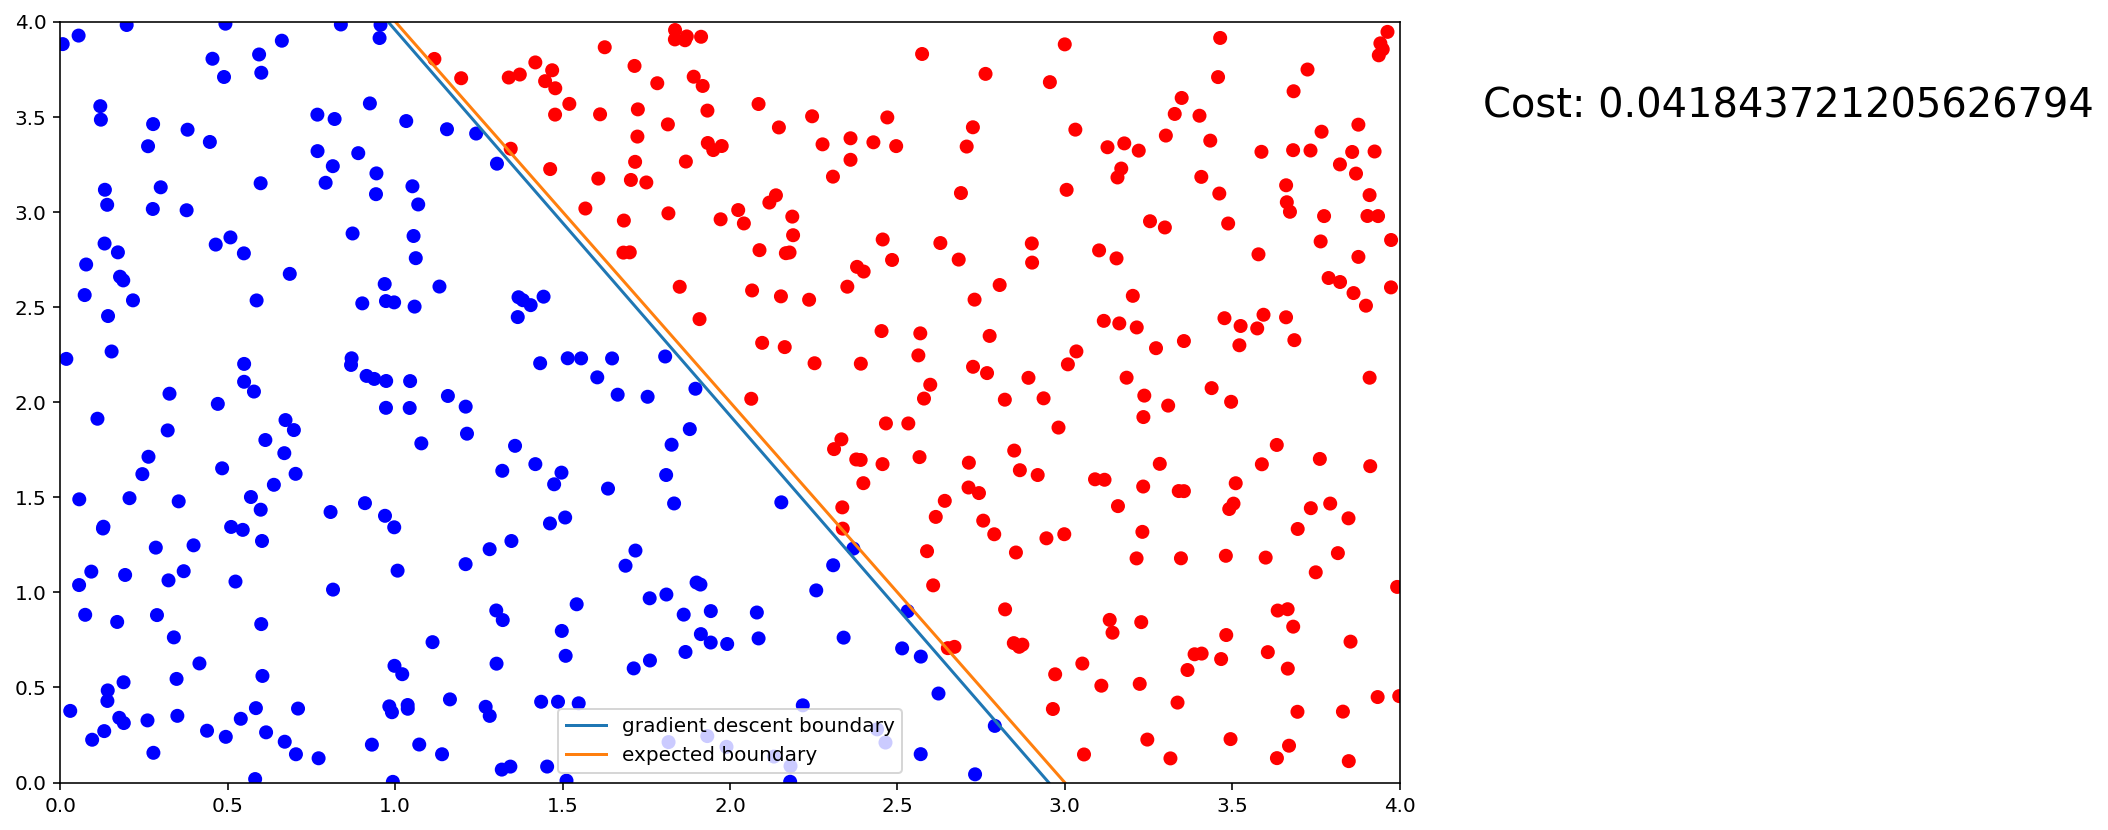

In [14]:
# plot our findings
plot_classification = (3 - plot_log_x - 0.5 * plot_log_y > 0)
plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap = "bwr_r")

plt.ylim(0, 4)
plt.xlim(0, 4)

plt.plot([0, thetas[0][0] / (-thetas[1][0])], [thetas[0][0] / (-thetas[2][0]),0], label="gradient descent boundary")
plt.plot([0, 3], [6, 0], label = "expected boundary")

plt.text(4.25, 3.5, ("Cost: " + str(cost(pred_output, logistic_output, m))), fontsize = 20)
plt.legend()

###### We can also use our model to predict values (the colors are inverted to see the contrast better)

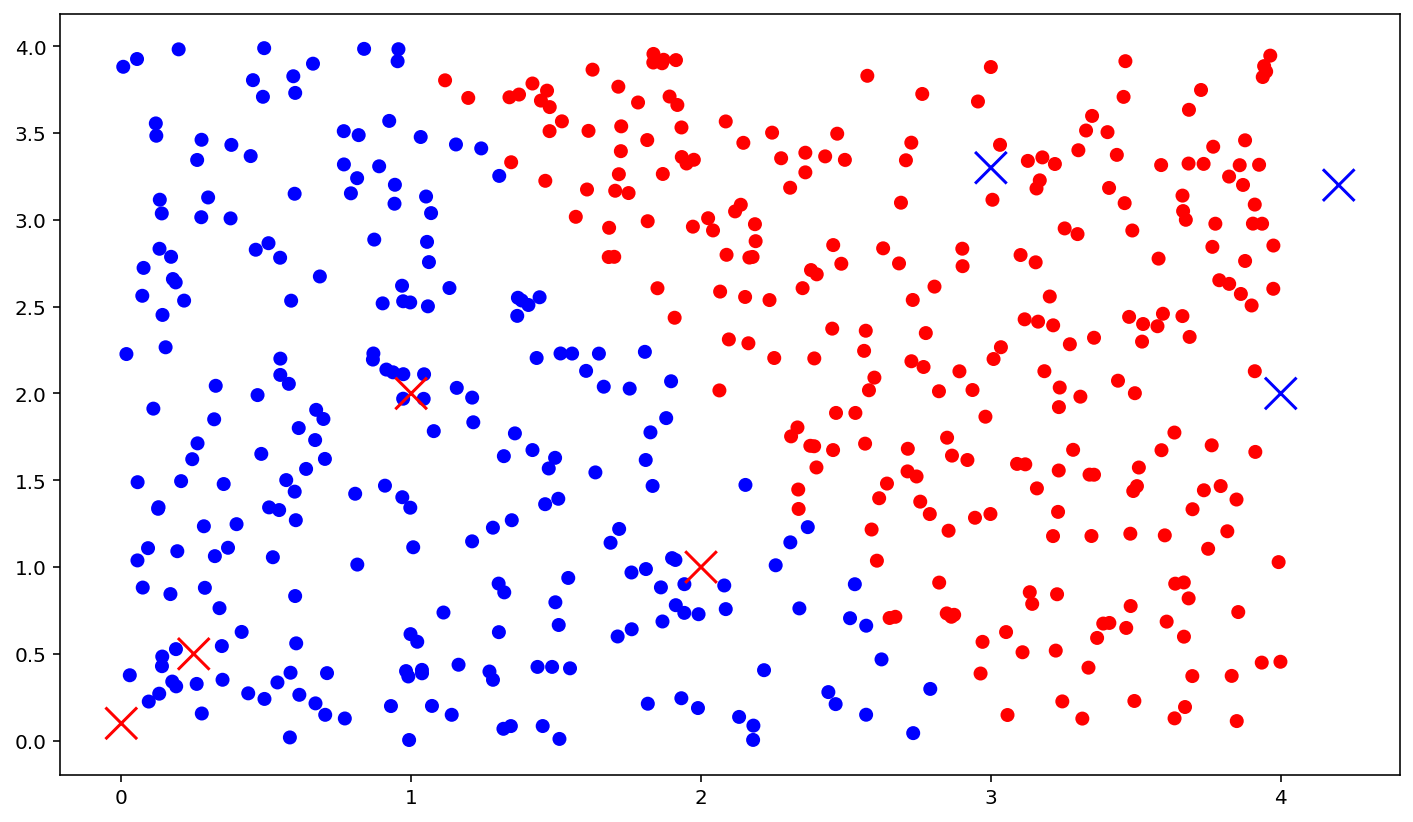

In [15]:
# plotting chosen predicted values
pred_var_one = [1, 3, 0.25, 0, 4.2, 2, 4]
pred_var_two = [2, 3.3, 0.5, 0.1, 3.2, 1, 2]
pred_inputs = np.matrix([np.ones(len(pred_var_one)), pred_var_one, pred_var_two]).T
pred_outputs = np.array(sigmoid(pred_inputs @ thetas) > 0.5)

plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap = "bwr_r")
plt.scatter(pred_var_one, pred_var_two, c = pred_outputs, marker = "x", s = 250, cmap = "bwr_r")